In [3]:
# ==============================================================
# 🔹 STEP 1: Import Libraries
# ==============================================================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
data_dir = "Dataset"

# ==============================================================
# 🔹 STEP 3: Data Preprocessing & Augmentation
# ==============================================================
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 548 images belonging to 4 classes.
Found 136 images belonging to 4 classes.


In [5]:
# Build CNN Model

model = Sequential(
    [Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
     MaxPooling2D(2,2),
     
     Conv2D(64, (3,3), activation='relu'),
     MaxPooling2D(2,2),
     
     Flatten(),
     Dense(256, activation='relu'),
     Dropout(0.5),
     Dense(4, activation='softmax')]
)


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    21,233,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,254,340 (81.08 MB)

 Trainable params: 21,254,340 (81.08 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train Model

early_stop = EarlyStopping(monitor = 'val_loss', patience = 25, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only = True)

history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 100,
    callbacks = [early_stop, checkpoint]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6911 - loss: 0.7364 - val_accuracy: 0.5662 - val_loss: 2.1688
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6816 - loss: 0.6363 - val_accuracy: 0.5809 - val_loss: 2.4993
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7465 - loss: 0.5552 - val_accuracy: 0.5662 - val_loss: 3.4232
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7027 - loss: 0.5580 - val_accuracy: 0.5956 - val_loss: 4.2148
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7261 - loss: 0.5295 - val_accuracy: 0.5662 - val_loss: 2.2694
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 968ms/step - accuracy: 0.7252 - loss: 0.5489 - val_accuracy: 0.5662 - val_loss: 4.7605
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 991ms/step - accuracy: 0.7777 - loss: 0.5040 - val_accuracy: 0.5735 - val_loss: 4.4001
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7387 - loss: 0.5386 - val_accuracy: 0.56

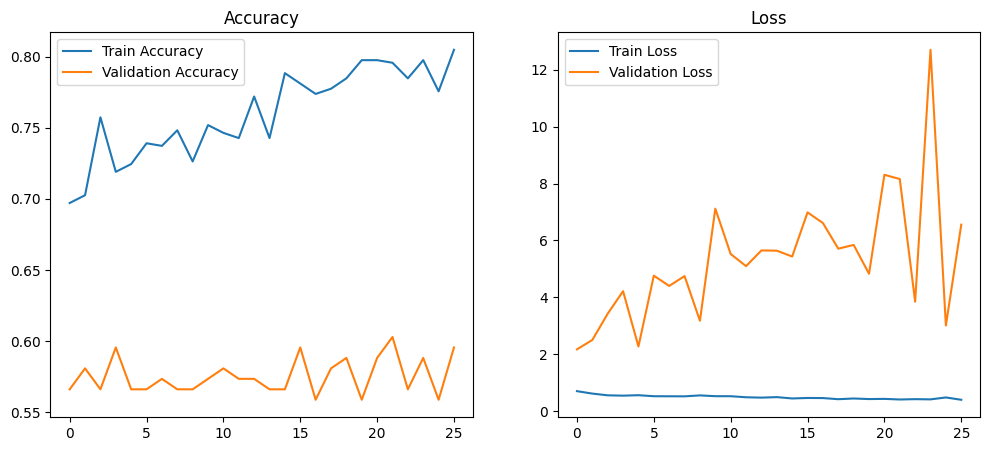

In [14]:
# Visualize the Training Performance

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.5760 - loss: 2.1289
Validation Accuracy: 55.88%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


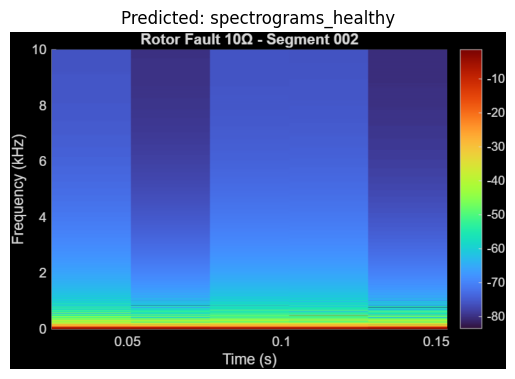

In [15]:
# Evaluate the Model

val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


# Test on a Random Image

from keras_preprocessing import image

img_path = val_generator.filepaths[1]
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

prediction = model.predict(img_array)
pred_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

plt.imshow(image.load_img(img_path))
plt.title(f'Predicted: {pred_class}')
plt.axis('off')
plt.show()